In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.table import Table
import numpy as np
import seaborn as sns
from io import StringIO

**Data Profiling**

Data profiling is the process of analyzing and understanding the characteristics and structure of a dataset. It involves examining the data to identify patterns, anomalies, and inconsistencies, as well as determining the quality and completeness of the data.

Data profiling typically involves looking at the basic statistics of the dataset, such as the number of observations, the number of missing values, the distribution of values, and the presence of outliers. 


In [58]:
df_org = pd.read_csv("homepap_merged dataset.csv")
print(df_org.columns)
df = df_org

Index(['nsrrid', 'age', 'gender', 'race3', 'ethnicity', 'neckcm', 'bmi',
       'systolic', 'diastolic', 'dxdiab', 'dxhtn', 'dxdep', 'dxemph', 'ahi',
       'acceptance', 'cal_total', 'ahi_full', 'fosq_global', 'systolic.1',
       'diastolic.1', 'cal_total.1', 'fosq_global.1', 'avgpapuse.1', 'bmi.3',
       'systolic.3', 'diastolic.3', 'cal_total.3', 'fosq_global.3',
       'avgpapuse.3'],
      dtype='object')


In the code below, I have analysed the basic stats of the baseline dataset mainly column age and gender. I have also calculated the number of unique and null values in each column. And to understand the distribution better, I have used histogram. Skewness of the data is also printed. 

In [59]:

summary_stats = df.describe().loc[['count', 'mean', 'min','max']].round(2).transpose()

null_count = df.isnull().sum()
skewness = df.skew()

summary_df = pd.concat([summary_stats, null_count.to_frame(name='null count'), skewness.to_frame(name='skewness')], axis=1)

print(summary_df)

               count        mean         min         max  null count  skewness
nsrrid         142.0  1600188.27  1600001.00  1600373.00           0 -0.061840
age            142.0       49.46       21.00       80.00           0 -0.063849
gender         142.0        0.65        0.00        1.00           0 -0.625887
race3          142.0        1.34        1.00        3.00           0  1.698415
ethnicity      141.0        1.91        1.00        2.00           1 -2.849574
neckcm         142.0       43.86       34.67       56.07           0  0.070078
bmi            141.0       38.78       23.59       71.48           1  1.048987
systolic       141.0      127.27       97.00      165.00           1  0.396164
diastolic      141.0       79.71       56.00      106.00           1 -0.013167
dxdiab         141.0        0.21        0.00        1.00           1  1.472071
dxhtn          140.0        0.58        0.00        1.00           2 -0.321697
dxdep          137.0        0.25        0.00        


Data validation
1. nsrrid: Check for duplicates or invalid identifiers.
2. age: Check for negative values or unrealistic age values (e.g., > 120).
3. gender: Check for consistency in categorical representation (e.g., 0/1 or Male/Female) and remove any invalid entries.
4. race3: Validate the categorical representation, and remove or impute any invalid entries.
5. ethnicity: Validate the categorical representation, and remove or impute any invalid entries.
6. neckcm: Check for negative or unrealistic values.
7. bmi: Check for negative or unrealistic values.
8. systolic: Check for negative or unrealistic values.
9. diastolic: Check for negative or unrealistic values.
10. dxdiab: Validate the categorical representation, and remove or impute any invalid entries.
11. dxhtn: Validate the categorical representation, and remove or impute any invalid entries.
12. dxdep: Validate the categorical representation, and remove or impute any invalid entries.
13. dxemph: Validate the categorical representation, and remove or impute any invalid entries.
14. ahi: Check for negative or unrealistic values.
15. acceptance: Validate the categorical representation, and remove or impute any invalid entries.
16. cal_total: Check for negative or unrealistic values.
17. ahi_full: Check for negative or unrealistic values.
18. fosq_global: Check for negative or unrealistic values.

Data Cleansing

Data cleansing, also known as data cleaning or data scrubbing, is the process of identifying and correcting or removing errors, inconsistencies, and inaccuracies in a dataset. The goal of data cleansing is to improve the quality of the data, making it more accurate, complete, and consistent.


In [60]:
og_length = len(df)
df = df.drop_duplicates(subset='nsrrid', keep='first')
dup = og_length - len(df)
df = df[(df['age'] >= 0) & (df['age'] <= 120)]
age = og_length - dup - len(df)
gender_mapping = {'Male': 0, 'Female': 1}
df['gender'] = df['gender'].replace(gender_mapping)
df = df[(df['neckcm'] > 0) ]
# df = df[(df['bmi.3'] > 0) | (df['bmi'] > 0)]
neck = og_length - dup - age - len(df)
df = df[(df['systolic'] > 0) & (df['diastolic'] > 0)]
b_sys = og_length - dup - age - neck - len(df)
df = df[(df['systolic.1'] > 0) & (df['diastolic.1'] > 0)]
sys1 = og_length - dup - age - neck - b_sys - len(df)
df = df[(df['systolic.3'] > 0) & (df['diastolic.3'] > 0)]
sys2 = og_length - dup - age - neck - b_sys - sys1 - len(df)


# binary_columns = ['dxdiab', 'dxhtn', 'dxdep', 'dxemph']
# for col in binary_columns:
#     df = df[df[col].isin([0, 1])]
# df = df[df['ahi'] >= 0]
# df = df[df['acceptance'].isin([0, 1])]
# df = df[ (df['cal_total'] >= 0) | (df['cal_total.1'] >= 0) | (df['cal_total.3'] >= 0)]

# df = df[ (df['fosq_global'] >= 0) | (df['fosq_global.1'] >= 0) | (df['fosq_global.3'] >= 0)]

df = df[(df['avgpapuse.1'] >= 0) | (df['avgpapuse.3'] >= 0)]
avgpause = og_length - dup - age - neck - b_sys - sys1 - sys2 - len(df)

invalid_data = [['duplicates', dup], ['age', age], ['neck', neck], ['baseline BP', b_sys], ['1 month BP', sys1], ['3month BP', sys2], ['pap use', avgpause]]
invalid = pd.DataFrame(invalid_data, columns = ['Catagory', 'invalid'])
display(invalid)
df


,Catagory,invalid
0,duplicates,0
1,age,0
2,neck,0
3,baseline BP,1
4,1 month BP,9
5,3month BP,2
6,pap use,0


,nsrrid,age,gender,race3,ethnicity,neckcm,bmi,systolic,diastolic,dxdiab,...,diastolic.1,cal_total.1,fosq_global.1,avgpapuse.1,bmi.3,systolic.3,diastolic.3,cal_total.3,fosq_global.3,avgpapuse.3
0,1600001,52,1,2,2.0,43.166667,33.234794,124.0,81.0,0.0,...,71.0,4.88,19.75,268.0,32.637582,130.0,65.0,4.87,19.78,206.0
1,1600002,53,1,1,2.0,50.266667,40.818115,125.0,77.0,0.0,...,84.0,3.07,16.74,54.0,39.883126,140.0,81.0,4.34,18.19,243.0
2,1600007,58,1,3,2.0,47.066667,46.909469,128.0,61.0,1.0,...,60.0,2.46,12.45,369.0,45.327784,121.0,64.0,1.76,15.90,352.0
3,1600009,42,1,1,2.0,44.333333,63.117284,139.0,94.0,0.0,...,78.0,3.45,15.63,222.0,63.055556,126.0,86.0,3.98,15.54,214.0
4,1600010,36,1,1,2.0,48.366667,35.662224,133.0,87.0,0.0,...,77.0,4.59,18.13,130.0,35.297793,150.0,89.0,2.61,11.32,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,1600365,32,1,2,2.0,48.166667,52.532243,132.0,84.0,0.0,...,89.0,4.96,17.75,120.0,51.617147,175.0,100.0,4.79,19.75,199.0
138,1600366,34,1,1,2.0,42.333333,28.650791,121.0,81.0,0.0,...,85.0,2.42,15.85,55.0,29.150151,130.0,90.0,2.53,15.76,NaN
139,1600370,51,0,2,2.0,43.133333,37.633309,159.0,79.0,1.0,...,81.0,2.90,16.75,95.0,37.370343,134.0,77.0,3.98,16.64,264.0
140,1600372,62,1,1,2.0,50.766667,36.571429,122.0,78.0,0.0,...,72.0,6.19,19.49,260.0,36.865306,132.0,68.0,6.59,19.60,193.0


In [8]:
df_clean = df.dropna(subset=['fosq_global'])

print(f"Original number of rows: {len(df_org)}")
print(f"Number of rows after removing missing values: {len(df_clean)}")


Original number of rows: 142
Number of rows after removing missing values: 130


In [10]:
summary_stats = df.describe().loc[['count', 'mean', 'min','max']].round(2).transpose()

null_count = df.isnull().sum()
skewness = df.skew()

summary_df = pd.concat([summary_stats, null_count.to_frame(name='null count'), skewness.to_frame(name='skewness')], axis=1)

print(summary_df)

               count        mean         min         max  null count  skewness
nsrrid         130.0  1600189.46  1600001.00  1600373.00           0 -0.067742
age            130.0       49.64       21.00       80.00           0 -0.074578
gender         130.0        0.64        0.00        1.00           0 -0.583138
race3          130.0        1.35        1.00        3.00           0  1.658179
ethnicity      129.0        1.90        1.00        2.00           1 -2.683692
neckcm         130.0       43.73       34.67       56.07           0  0.143017
bmi            129.0       38.81       23.59       71.48           1  1.063449
systolic       130.0      127.03       97.00      165.00           0  0.447274
diastolic      130.0       79.80       56.00      106.00           0  0.020832
dxdiab         129.0        0.21        0.00        1.00           1  1.446024
dxhtn          128.0        0.57        0.00        1.00           2 -0.287452
dxdep          125.0        0.26        0.00        

In [9]:
df.to_csv('homepap_cleaned.csv', index=False)

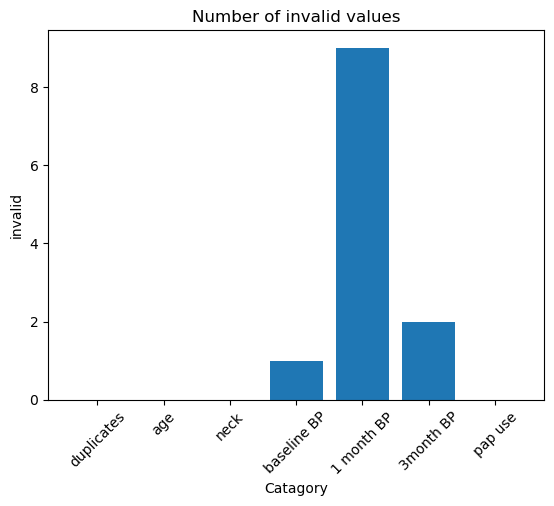

In [67]:
plt.bar(x = invalid['Catagory'], height = invalid['invalid'])
plt.xticks(rotation = 45)
plt.xlabel('Catagory')
plt.ylabel('invalid')
plt.title('Number of invalid values')

plt.show()